In [93]:
#from google.colab import drive
#drive.mount('/content/drive')

# Import

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scikitplot as skplt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import argmax

# Dataset

In [95]:
df = pd.read_csv(r"C:\Users\erick\OneDrive\Documentos\GitHub\data-science\Preprocessing\Balancing\data_set02.csv", sep=';')
df.drop('id', axis=1, inplace=True)
df.columns

Index(['result_igm', 'age_category', 'sex', 'conjunctivitis.x',
       'asymptomatic.x', 'abdomen_pain.x', 'chills.x', 'diarrhea.x',
       'missing_smell.x', 'missing_tasty.x', 'nausea.x', 'body_pain.x',
       'cough.x', 'fever.x', 'hard_breathe.x', 'head_pain.x', 'running_nose.x',
       'throat_pain.x', 'conjunctivitis.y', 'asymptomatic.y', 'abdomen_pain.y',
       'chills.y', 'diarrhea.y', 'missing_smell.y', 'missing_tasty.y',
       'nausea.y', 'body_pain.y', 'cough.y', 'fever.y', 'hard_breathe.y',
       'head_pain.y', 'running_nose.y', 'throat_pain.y'],
      dtype='object')

In [96]:
df1 = pd.read_csv(r"C:\Users\erick\OneDrive\Documentos\GitHub\data-science\Preprocessing\Balancing\data_set02.csv", sep=';')
df1.drop('id', axis=1, inplace=True)
df1.drop('result_igm', axis=1, inplace=True)

In [97]:
df['age_category'].nunique()

9

In [98]:
df.shape

(1192297, 33)

In [99]:
df['result_igm'].value_counts()

0    1120640
1      71657
Name: result_igm, dtype: int64

???
Deve-se usar vectorizer? Isso iguala qualquer classificação de idade acima de 1 igual a 1.
- https://towardsdatascience.com/tf-idf-explained-and-python-sklearn-implementation-b020c5e83275


In [100]:
#vectorizer = TfidfVectorizer(binary = True)
#matrix = vectorizer.fit_transform(df1)
#X = matrix


In [101]:
X = df1

In [102]:
#features

In [103]:
#features.to_numpy

# Scaler e definição de variáveis

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [105]:
X = scaled_X

In [106]:
X

array([[ 0.23978292,  0.92985043, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       [-1.59855278,  0.92985043, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       [ 0.23978292, -1.07544177, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       ...,
       [-0.98577422, -1.07544177, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       [ 0.23978292,  0.92985043, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       [ 0.85256148, -1.07544177, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665]])

In [107]:
y = df['result_igm']

# Random Forest

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(f"Estatísticas do target y: {Counter(y_train)}")
print(f"Estatísticas do target X: {Counter(y_test)}")

Estatísticas do target y: Counter({0: 784451, 1: 50156})
Estatísticas do target X: Counter({0: 336189, 1: 21501})


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [110]:
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [111]:
y_pred = rfc.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369951
           1       0.17      0.01      0.02     23508

    accuracy                           0.94    393459
   macro avg       0.56      0.50      0.49    393459
weighted avg       0.89      0.94      0.91    393459



In [113]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [114]:
print(confusion_matrix(y_test, y_pred))

[[369027    924]
 [ 23314    194]]


In [115]:
a_s = accuracy_score(y_test, y_pred)
print(a_s)

0.9383976475312549


In [116]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.01575570535206692


In [117]:
y_score = rfc.predict_proba(X_test)
print(y_score)

[[0.94825864 0.05174136]
 [0.958841   0.041159  ]
 [0.958841   0.041159  ]
 ...
 [0.96285714 0.03714286]
 [0.95063705 0.04936295]
 [0.94825864 0.05174136]]


In [118]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

In [119]:
roc_auc0 = auc(fpr0, tpr0)

In [120]:
thresholds

array([1.98133333e+00, 9.81333333e-01, 9.78333333e-01, ...,
       8.09716599e-05, 7.87401575e-05, 0.00000000e+00])

Youden's J statistic
- https://en.wikipedia.org/wiki/Youden%27s_J_statistic

In [121]:
J = tpr0 - fpr0
print(J)



[ 0.00000000e+00 -2.70306068e-06  3.44295282e-05 ... -2.99486429e-03
 -3.00297347e-03  0.00000000e+00]


In [122]:
ix = argmax(J)
print(ix)

6414


In [123]:
y_score1 = np.array([[1, y[1]] if y[0] >= ix else [0, y[1]] for y in y_score])
print(y_score1)

[[0.         0.05174136]
 [0.         0.041159  ]
 [0.         0.041159  ]
 ...
 [0.         0.03714286]
 [0.         0.04936295]
 [0.         0.05174136]]


# Resultado Random Forest

In [124]:
print('A matriz de classificação: %s' % (classification_report(y_test, y_pred)) )
print('A matriz de confusão: %s' % (confusion_matrix(y_test, y_pred)) )
print('A acurácia do modelo: %s' % accuracy_score(y_test, y_pred) )
print('Valor do F1-score: %s' % f1_score(y_test, y_pred) )



A matriz de classificação:               precision    recall  f1-score   support

           0       0.94      1.00      0.97    369951
           1       0.17      0.01      0.02     23508

    accuracy                           0.94    393459
   macro avg       0.56      0.50      0.49    393459
weighted avg       0.89      0.94      0.91    393459

A matriz de confusão: [[369027    924]
 [ 23314    194]]
A acurácia do modelo: 0.9383976475312549
Valor do F1-score: 0.01575570535206692


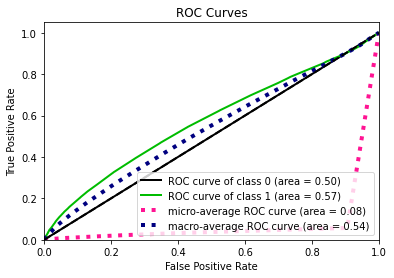

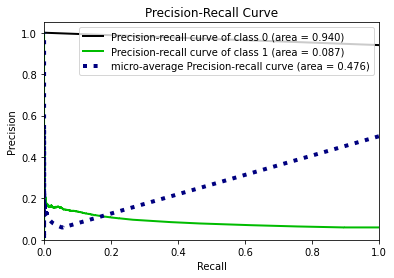

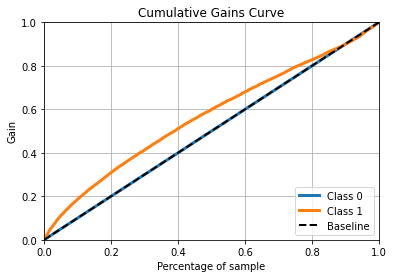

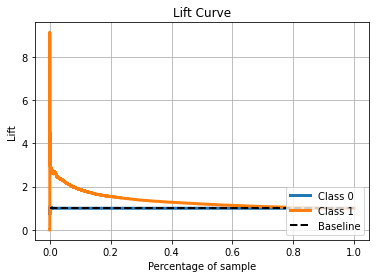

In [125]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
plot_roc(y_test, y_score1)
plt.show()
    
plot_precision_recall(y_test, y_score1)
plt.show()
    
plot_cumulative_gain(y_test, y_score1)
plt.show()
    
plot_lift_curve(y_test, y_score1)
plt.show()

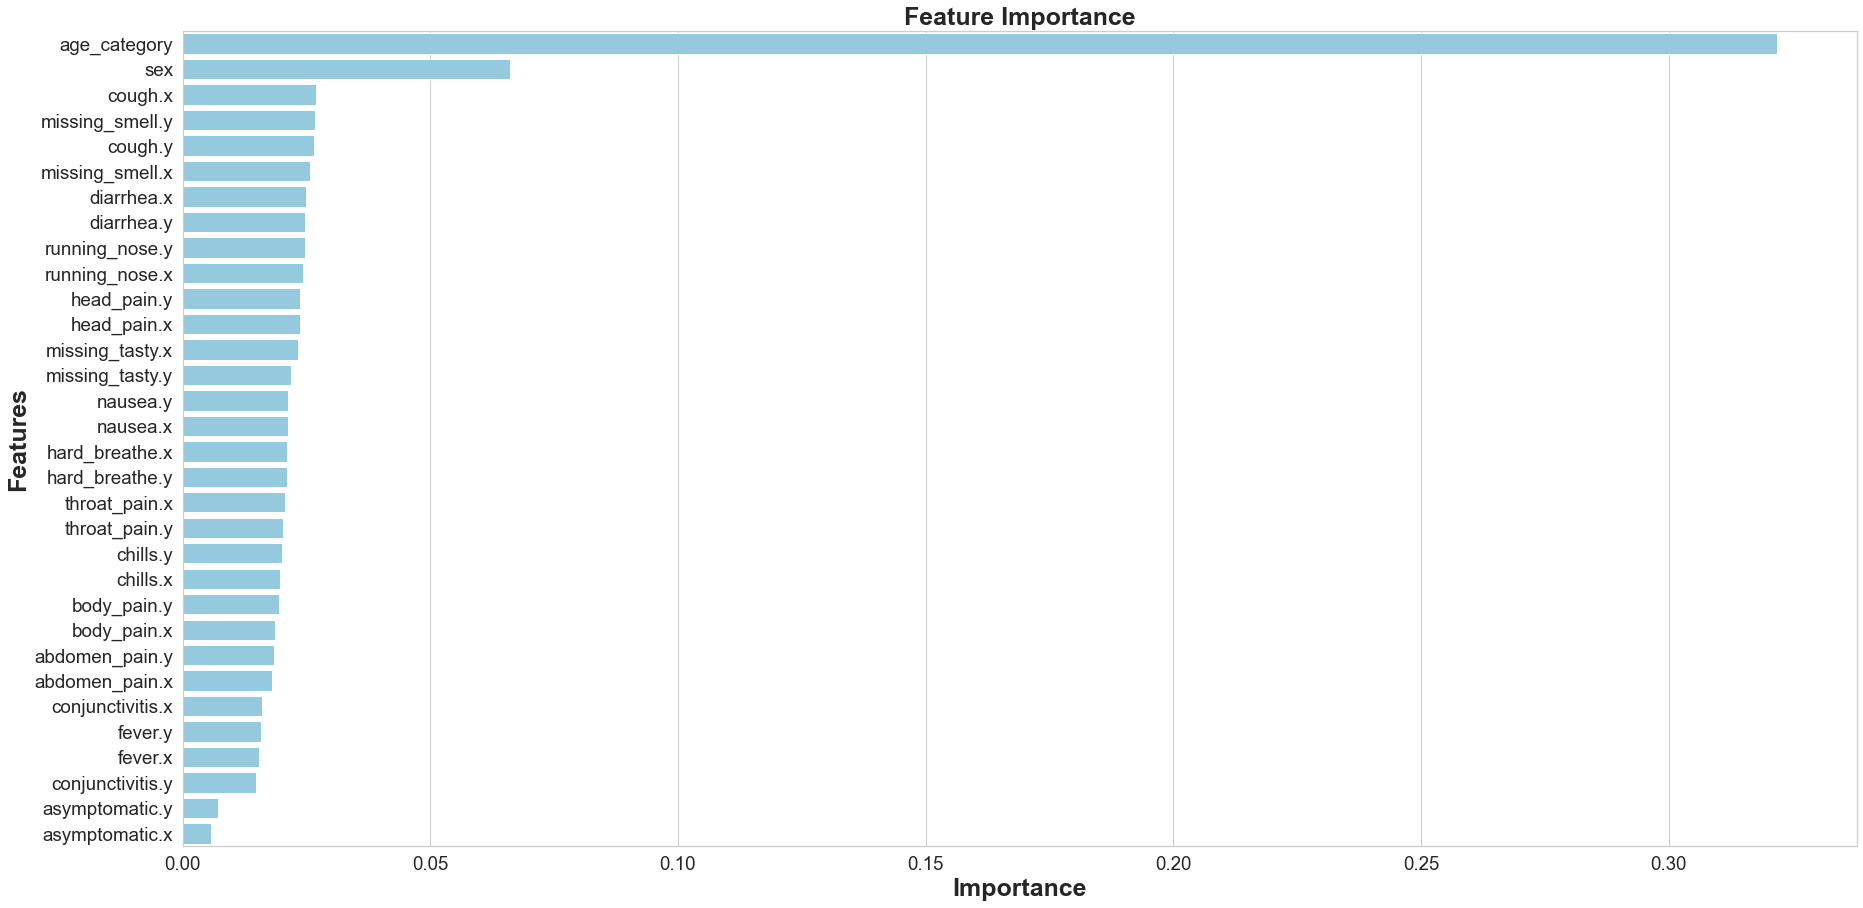

None

,Features,Gini-Importance
0,age_category,0.321834
1,sex,0.066060
2,cough.x,0.026867
3,missing_smell.y,0.026812
4,cough.y,0.026452
5,missing_smell.x,0.025636
6,diarrhea.x,0.024901
7,diarrhea.y,0.024694
8,running_nose.y,0.024650
9,running_nose.x,0.024218


In [126]:
feats = {}
for feature, importance in zip(df1.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

# Random Forest (Random Over Sampler)

In [127]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\erick\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [128]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy = 'minority', random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [129]:
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_res, y_res)

RandomForestClassifier(criterion='entropy')

In [130]:
y_pred = rfc.predict(X_test)

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84    369951
           1       0.08      0.36      0.13     23508

    accuracy                           0.72    393459
   macro avg       0.52      0.55      0.49    393459
weighted avg       0.90      0.72      0.79    393459



In [132]:
print(confusion_matrix(y_test, y_pred))

[[276544  93407]
 [ 15110   8398]]


In [133]:
a_s = accuracy_score(y_test, y_pred)
print(a_s)

0.724197438614951


In [134]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.1340323829131854


In [135]:
y_score = rfc.predict_proba(X_test)
print(y_score)

[[0.54142198 0.45857802]
 [0.59830253 0.40169747]
 [0.59830253 0.40169747]
 ...
 [0.97073027 0.02926973]
 [0.55231678 0.44768322]
 [0.54142198 0.45857802]]


In [136]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

In [137]:
roc_auc0 = auc(fpr0, tpr0)

In [138]:
thresholds

array([2.0000000e+00, 1.0000000e+00, 9.9000000e-01, ..., 1.4159292e-03,
       1.2000000e-03, 0.0000000e+00])

Youden's J statistic
- https://en.wikipedia.org/wiki/Youden%27s_J_statistic

In [139]:
J = tpr0 - fpr0
print(J)

[ 0.          0.00276591  0.00280844 ... -0.00121615 -0.00122155
  0.        ]


In [140]:
ix = argmax(J)
print(ix)

4242


In [141]:
y_score1 = np.array([[1, y[1]] if y[0] >= ix else [0, y[1]] for y in y_score])
print(y_score1)

[[0.         0.45857802]
 [0.         0.40169747]
 [0.         0.40169747]
 ...
 [0.         0.02926973]
 [0.         0.44768322]
 [0.         0.45857802]]


In [142]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 750689, 1: 750689})
Testing target statistics: Counter({0: 369951, 1: 23508})


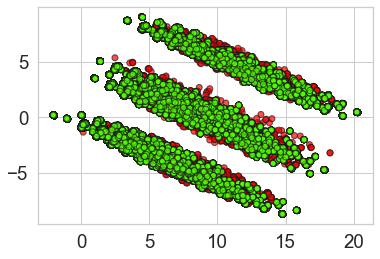

Precision score 0.0825410247082305
Recall score 0.35711247234983834
F1-score score 0.13408936628998122
Accuracy score 0.7244312622153769


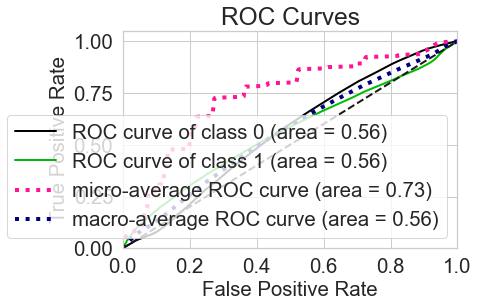

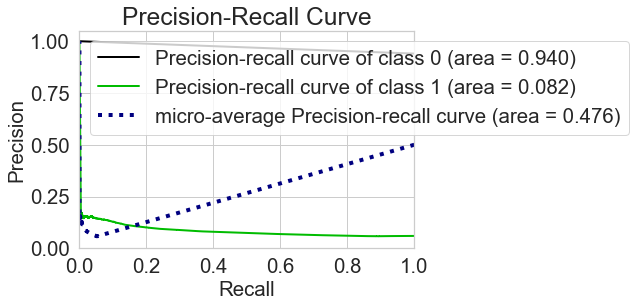

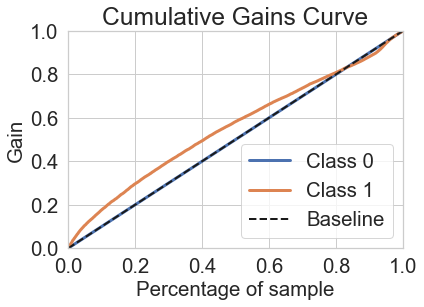

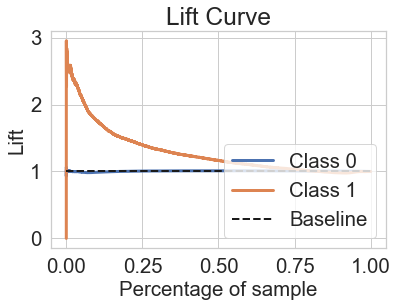

              precision    recall  f1-score   support

           0       0.95      0.75      0.84    369951
           1       0.08      0.36      0.13     23508

    accuracy                           0.72    393459
   macro avg       0.52      0.55      0.49    393459
weighted avg       0.90      0.72      0.79    393459



In [143]:
roc_auc_ros,fpr_ros,tpr_ros, _ = build_and_test(X_res, X_test, y_res, y_test)

# Resultado Random Forest 
- (Random OverSample)

In [144]:
print('A matriz de classificação: %s' % (classification_report(y_test, y_pred)) )
print('A matriz de confusão: %s' % (confusion_matrix(y_test, y_pred)) )
print('A acurácia do modelo: %s' % accuracy_score(y_test, y_pred) )
print('Valor do F1-score: %s' % f1_score(y_test, y_pred) )



A matriz de classificação:               precision    recall  f1-score   support

           0       0.95      0.75      0.84    369951
           1       0.08      0.36      0.13     23508

    accuracy                           0.72    393459
   macro avg       0.52      0.55      0.49    393459
weighted avg       0.90      0.72      0.79    393459

A matriz de confusão: [[276544  93407]
 [ 15110   8398]]
A acurácia do modelo: 0.724197438614951
Valor do F1-score: 0.1340323829131854


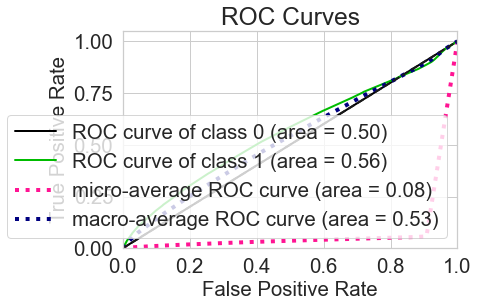

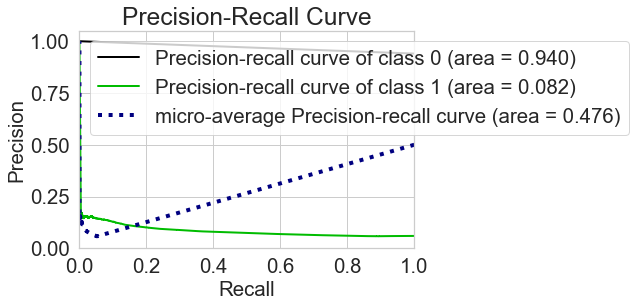

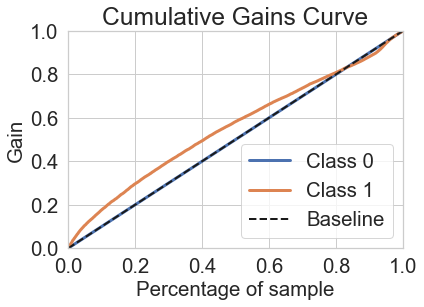

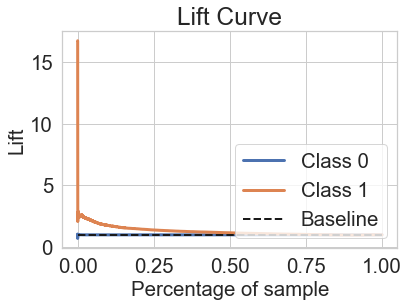

In [145]:
plot_roc(y_test, y_score1)
plt.show()
    
plot_precision_recall(y_test, y_score1)
plt.show()
    
plot_cumulative_gain(y_test, y_score1)
plt.show()
    
plot_lift_curve(y_test, y_score1)
plt.show()

# PCA

In [146]:
from sklearn.decomposition import PCA

In [147]:
pca = PCA(n_components=15)
pca_df = pca.fit_transform(scaled_X)
variancia = round(sum(pca.explained_variance_ratio_), 2)

In [148]:
y = df.result_igm
type(y)

pandas.core.series.Series

In [149]:
pca_df[:,:9].shape

(1192297, 9)

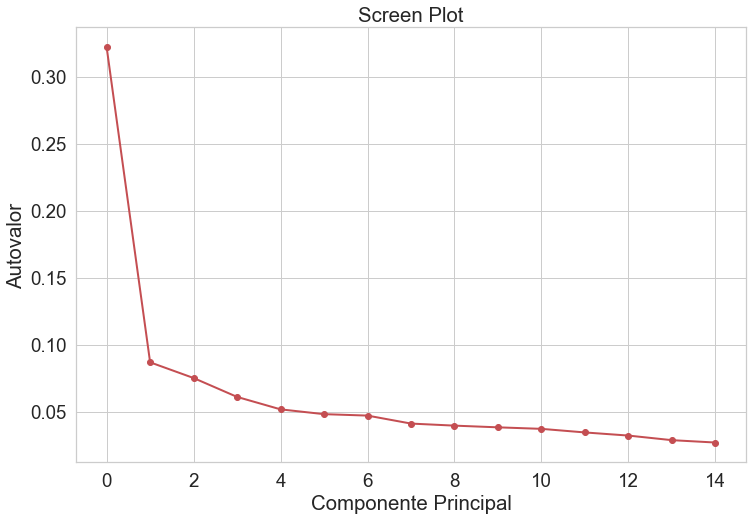

In [150]:
import numpy as np
fig = plt.figure(figsize=(12,8))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Screen Plot')
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')

plt.show()

# Random Forest Smote

In [151]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=100)
print(f"Estatistica de treinamento do target X: {Counter(y_train)}")
print(f"Estatistica de treinamento do target y: {Counter(y_test)}")

Estatistica de treinamento do target X: Counter({1: 525524, 0: 525440})
Estatistica de treinamento do target y: Counter({0: 225249, 1: 225165})


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [154]:
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [155]:
y_pred = rfc.predict(X_test)

In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369728
           1       0.18      0.01      0.02     23731

    accuracy                           0.94    393459
   macro avg       0.56      0.50      0.49    393459
weighted avg       0.89      0.94      0.91    393459



In [157]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [158]:
print(confusion_matrix(y_test, y_pred))

[[368798    930]
 [ 23528    203]]


In [159]:
a_s = accuracy_score(y_test, y_pred)
print(a_s)

0.9378385041389319


In [160]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.01632882882882883


In [161]:
y_score = rfc.predict_proba(X_test)
print(y_score)

[[0.94169553 0.05830447]
 [0.93094426 0.06905574]
 [0.92012794 0.07987206]
 ...
 [0.95881346 0.04118654]
 [0.95442524 0.04557476]
 [0.95881346 0.04118654]]


In [162]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

In [163]:
roc_auc0 = auc(fpr0, tpr0)

In [164]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.95000000e-01, ...,
       1.23456790e-04, 9.00900901e-05, 0.00000000e+00])

Youden's J statistic
- https://en.wikipedia.org/wiki/Youden%27s_J_statistic

In [165]:
J = tpr0 - fpr0
print(J)



[ 0.00000000e+00 -1.08187641e-05  7.07544936e-05 ... -2.66666726e-03
 -2.68019072e-03  0.00000000e+00]


In [166]:
ix = argmax(J)
print(ix)

6438


In [167]:
y_score1 = np.array([[1, y[1]] if y[0] >= ix else [0, y[1]] for y in y_score])
print(y_score1)

[[0.         0.05830447]
 [0.         0.06905574]
 [0.         0.07987206]
 ...
 [0.         0.04118654]
 [0.         0.04557476]
 [0.         0.04118654]]


# Resultado Random Forest
 - Smote

In [168]:
print('A matriz de classificação: %s' % (classification_report(y_test, y_pred)) )
print('A matriz de confusão: %s' % (confusion_matrix(y_test, y_pred)) )
print('A acurácia do modelo: %s' % accuracy_score(y_test, y_pred) )
print('Valor do F1-score: %s' % f1_score(y_test, y_pred) )



A matriz de classificação:               precision    recall  f1-score   support

           0       0.94      1.00      0.97    369728
           1       0.18      0.01      0.02     23731

    accuracy                           0.94    393459
   macro avg       0.56      0.50      0.49    393459
weighted avg       0.89      0.94      0.91    393459

A matriz de confusão: [[368798    930]
 [ 23528    203]]
A acurácia do modelo: 0.9378385041389319
Valor do F1-score: 0.01632882882882883


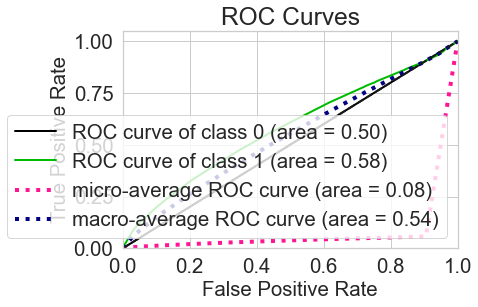

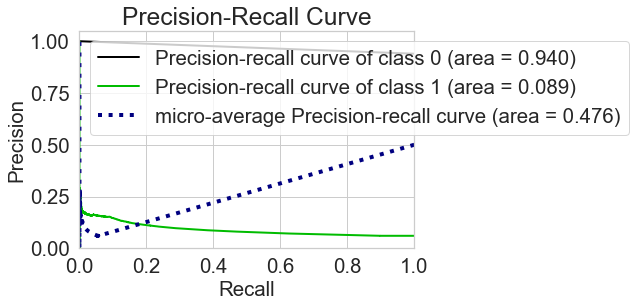

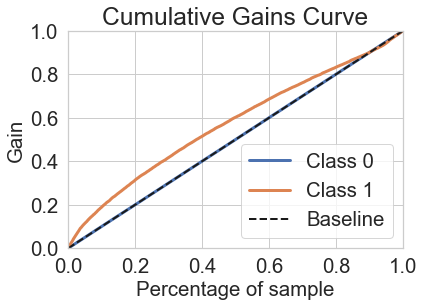

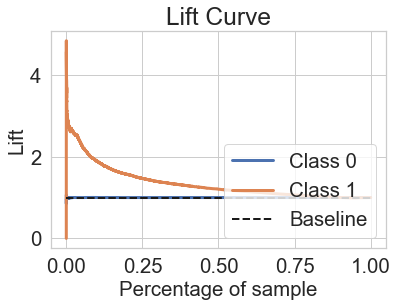

In [169]:
plot_roc(y_test, y_score1)
plt.show()
    
plot_precision_recall(y_test, y_score1)
plt.show()
    
plot_cumulative_gain(y_test, y_score1)
plt.show()
    
plot_lift_curve(y_test, y_score1)
plt.show()

# PCA e Laboratório

In [187]:

import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from numpy import argmax
import numpy as np

def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # Construindo PCA
    pca = PCA(n_components=15)
    pca.fit(X_tr.tolist())
    X_pca = pca.transform(X_tr.tolist())

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # Construindo Modelo
    if class_weight:
        model = RandomForestClassifier(criterion='entropy')
    else:
        model = RandomForestClassifier(criterion='entropy')
    model.fit(X_tr, y_tr)
    
    # Teste do modelo
    y_pred = model.predict(X_te)
    print('Resultado da prescisão %s' % precision_score(y_te, y_pred))
    print('Resultado do recall %s' % recall_score(y_te, y_pred))
    print('Resultado F1 %s' % f1_score(y_te, y_pred))
    print('Resultado acurácia %s' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculando o melhor threashold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # valor da maior estatística 
        best_threshold = thresholds[ix]
        # ajuste de acordo com o threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    # Plot 
    plot_roc(y_te, y_score)
    plt.show()
    
    plot_precision_recall(y_te, y_score1)
    plt.show()
    
    plot_cumulative_gain(y_te, y_score1)
    plt.show()
    
    plot_lift_curve(y_te, y_score)
    plt.show()
    
    # Print
    print(classification_report(y_te,y_pred))
    print(confusion_matrix(y_test, y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold

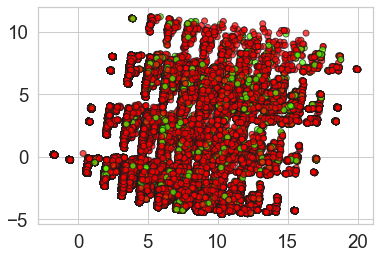

Resultado da prescisão 0.18592057761732853
Resultado do recall 0.008680628713497113
Resultado F1 0.01658681911510125
Resultado acurácia 0.937917292526032


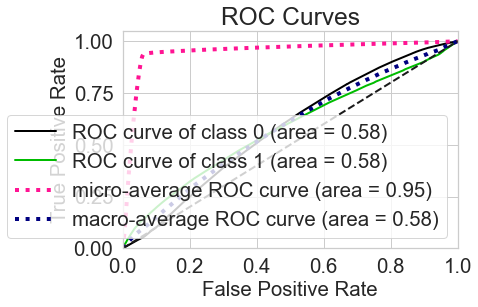

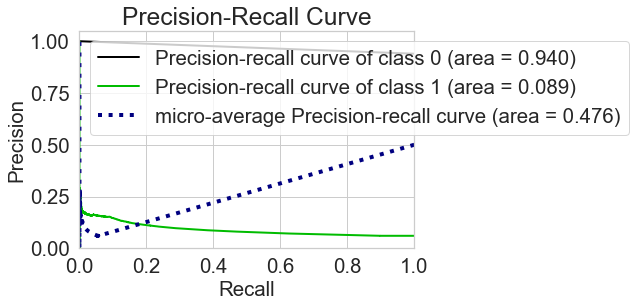

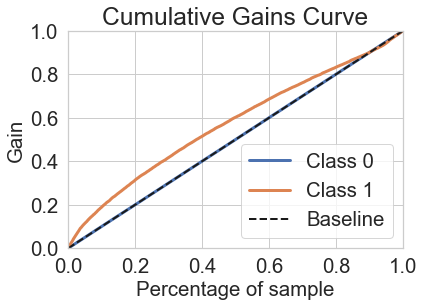

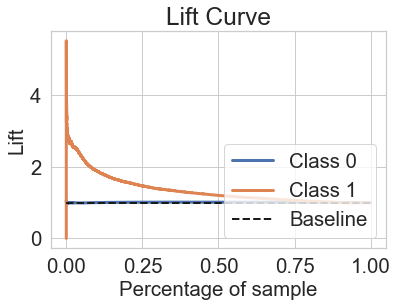

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369728
           1       0.19      0.01      0.02     23731

    accuracy                           0.94    393459
   macro avg       0.56      0.50      0.49    393459
weighted avg       0.89      0.94      0.91    393459

[[368826    902]
 [ 23525    206]]


In [188]:
roc_auc_imb,fpr_imb,tpr_imb, _ = build_and_test(X_train, X_test, y_train, y_test)

- Oversample

In [172]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 750912, 1: 750912})
Testing target statistics: Counter({0: 369728, 1: 23731})


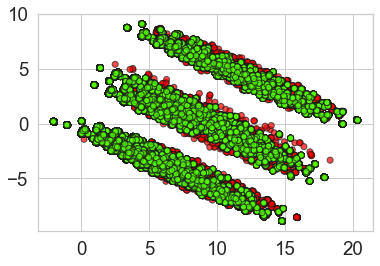

Precision score 0.08442604322091679
Recall score 0.36003539673844337
F1-score score 0.1367784074536548
Accuracy score 0.7259079090832844


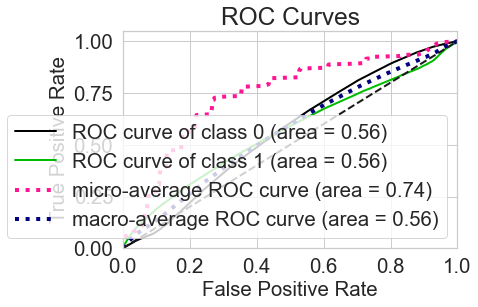

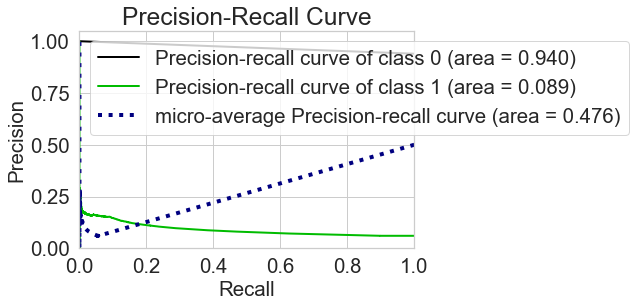

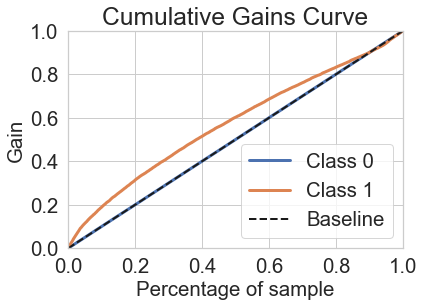

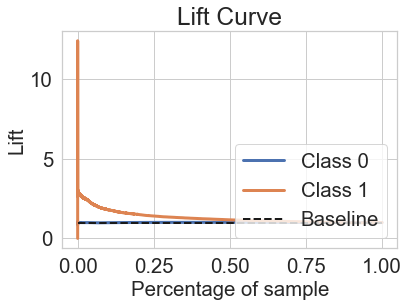

              precision    recall  f1-score   support

           0       0.95      0.75      0.84    369728
           1       0.08      0.36      0.14     23731

    accuracy                           0.73    393459
   macro avg       0.52      0.55      0.49    393459
weighted avg       0.90      0.73      0.79    393459



In [173]:
roc_auc_ros,fpr_ros,tpr_ros, _ = build_and_test(X_res, X_test, y_res, y_test)

- SMOTE

In [174]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 750912, 1: 750912})
Testing target statistics: Counter({0: 369728, 1: 23731})


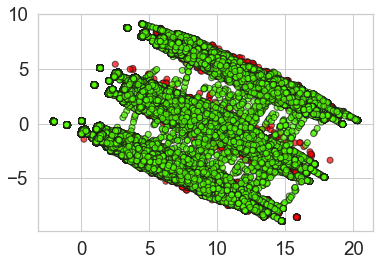

Precision score 0.08316057700613284
Recall score 0.32455438034638234
F1-score score 0.13239705364126278
Accuracy score 0.743447220676106


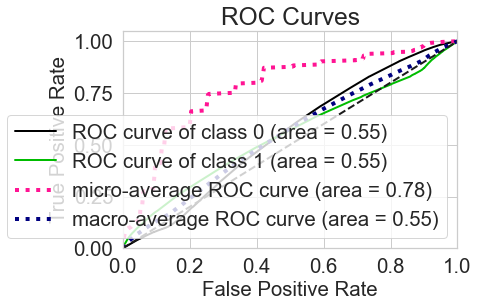

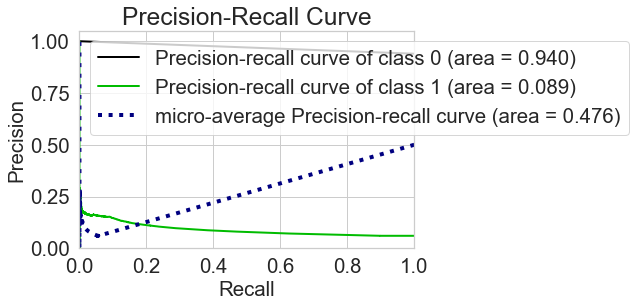

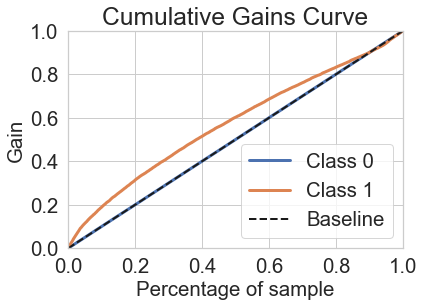

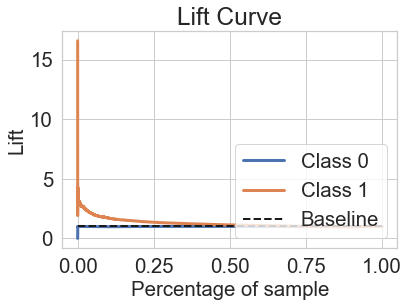

              precision    recall  f1-score   support

           0       0.95      0.77      0.85    369728
           1       0.08      0.32      0.13     23731

    accuracy                           0.74    393459
   macro avg       0.51      0.55      0.49    393459
weighted avg       0.89      0.74      0.81    393459



In [175]:
roc_auc_smote,fpr_smote,tpr_smote, _  = build_and_test(X_res, X_test, y_res, y_test)

In [178]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 47926, 1: 47926})
Testing target statistics: Counter({0: 369728, 1: 23731})


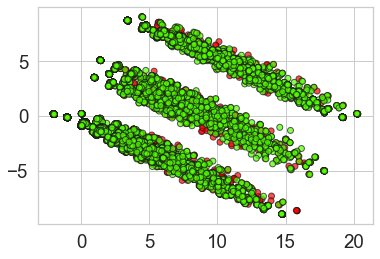

Precision score 0.08642733564013841
Recall score 0.42101049260461
F1-score score 0.14341388492151783
Accuracy score 0.6966672512256677


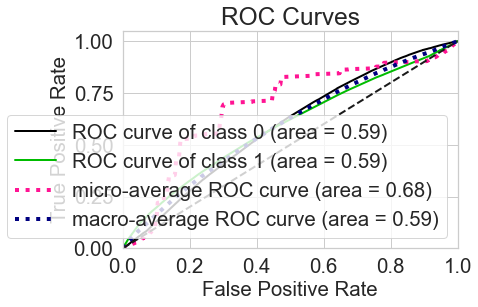

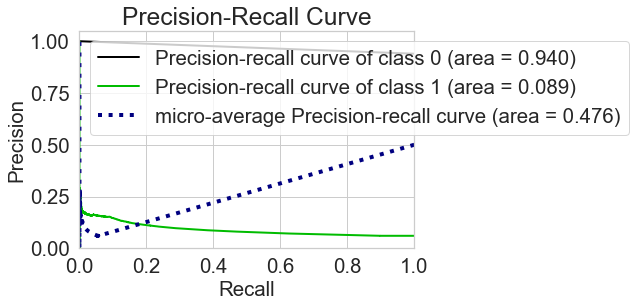

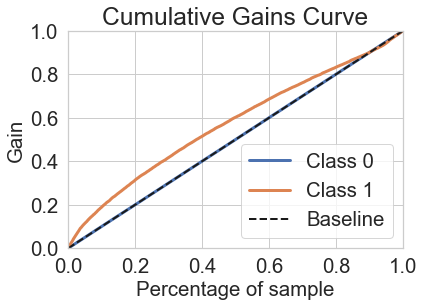

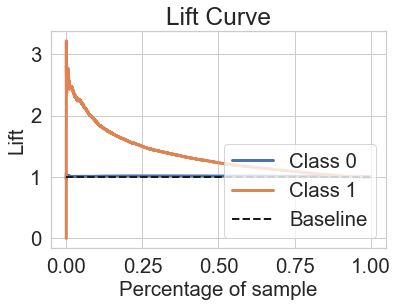

              precision    recall  f1-score   support

           0       0.95      0.71      0.82    369728
           1       0.09      0.42      0.14     23731

    accuracy                           0.70    393459
   macro avg       0.52      0.57      0.48    393459
weighted avg       0.90      0.70      0.78    393459



In [179]:
roc_auc_rus,fpr_rus,tpr_rus , _ = build_and_test(X_res, X_test, y_res, y_test)

In [180]:
from imblearn.under_sampling import NearMiss
under_sampler = NearMiss()
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 47926, 1: 47926})
Testing target statistics: Counter({0: 369728, 1: 23731})


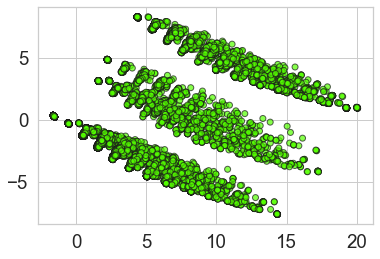

Precision score 0.07489149207293802
Recall score 0.48788504487800766
F1-score score 0.129850612354762
Accuracy score 0.6056209160293703


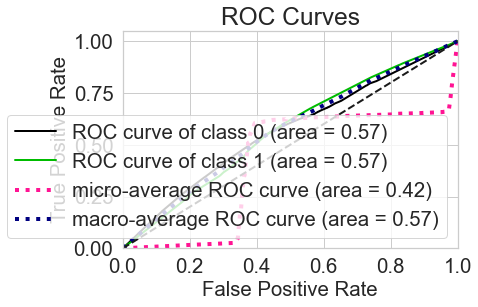

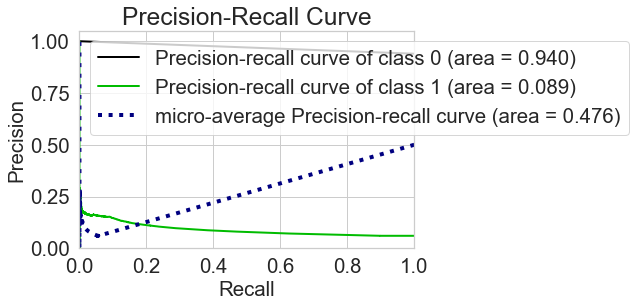

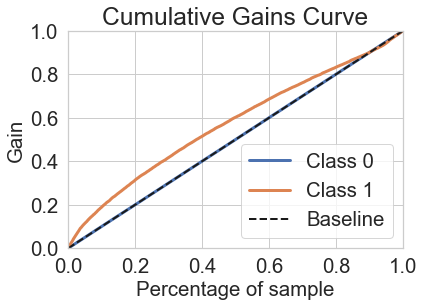

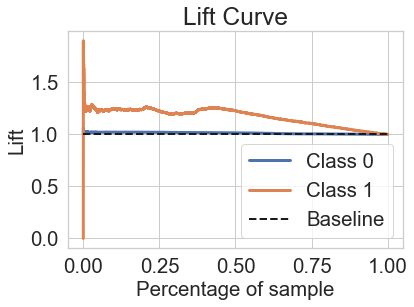

              precision    recall  f1-score   support

           0       0.95      0.61      0.75    369728
           1       0.07      0.49      0.13     23731

    accuracy                           0.61    393459
   macro avg       0.51      0.55      0.44    393459
weighted avg       0.90      0.61      0.71    393459



In [181]:
roc_auc_nm,fpr_nm,tpr_nm, _  = build_and_test(X_res, X_test, y_res, y_test)

In [182]:
n= Counter(y_train)
ratio = int(n[0]/n[1])
ratio, n

(15, Counter({0: 750912, 1: 47926}))

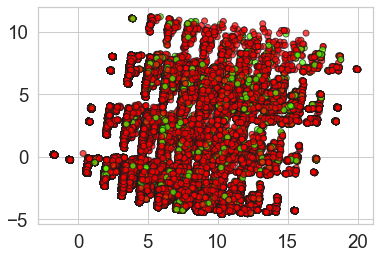

Precision score 0.17200365965233302
Recall score 0.007922127175424551
F1-score score 0.015146632291330973
Accuracy score 0.9378639197476738


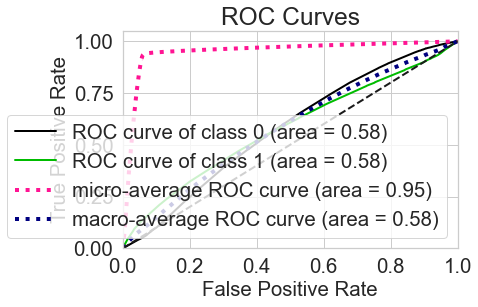

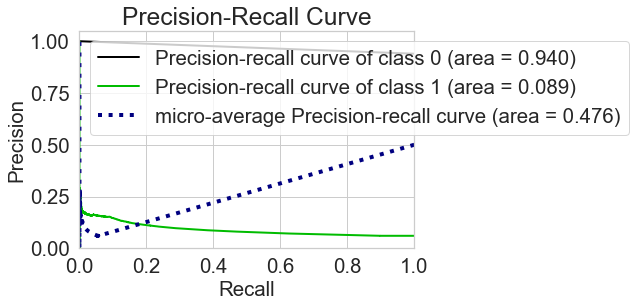

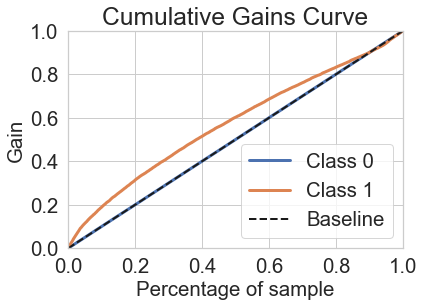

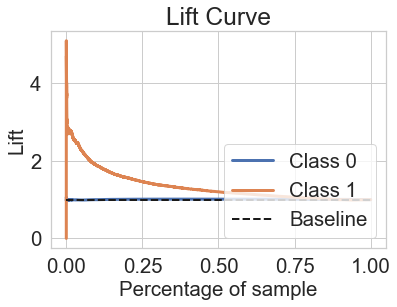

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369728
           1       0.17      0.01      0.02     23731

    accuracy                           0.94    393459
   macro avg       0.56      0.50      0.49    393459
weighted avg       0.89      0.94      0.91    393459



In [183]:
roc_auc_cw,fpr_cw,tpr_cw, _  = build_and_test(X_train, X_test, y_train, y_test, class_weight={0:1, 1:ratio})

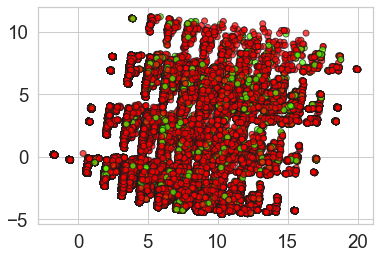

Precision score 0.17403314917127072
Recall score 0.007964266149761914
F1-score score 0.01523149454003304
Accuracy score 0.9378867937955416


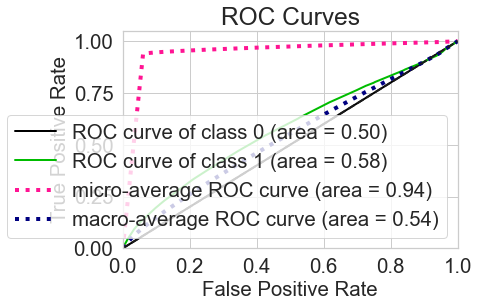

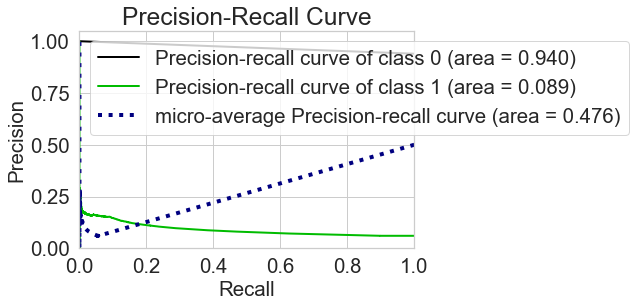

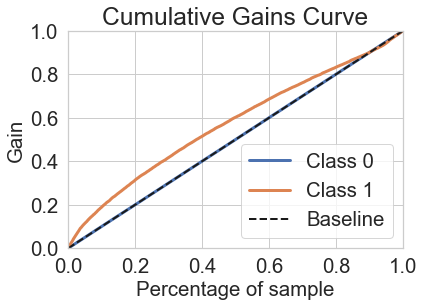

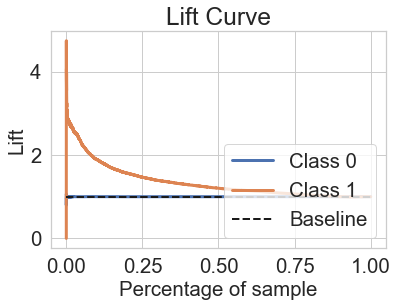

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369728
           1       0.17      0.01      0.02     23731

    accuracy                           0.94    393459
   macro avg       0.56      0.50      0.49    393459
weighted avg       0.89      0.94      0.91    393459

Best Treshold: 0.05816230413135214


In [184]:
roc_auc_thr,fpr_thr,tpr_thr, threshold = build_and_test(X_train, X_test, y_train, y_test, threshold=True)
print(f"Best Treshold: {threshold}")

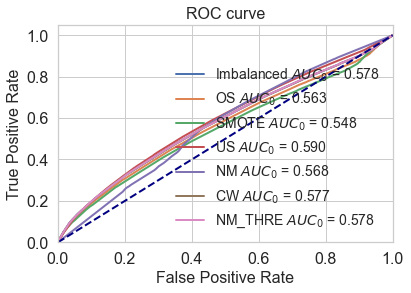

In [186]:
plt.plot(fpr_imb, tpr_imb, lw=2, label='Imbalanced $AUC_0$ = %.3f' % (roc_auc_imb))
plt.plot(fpr_ros, tpr_ros, lw=2, label='OS $AUC_0$ = %.3f' % (roc_auc_ros))
plt.plot(fpr_smote, tpr_smote, lw=2, label='SMOTE $AUC_0$ = %.3f' % (roc_auc_smote))
plt.plot(fpr_rus, tpr_rus, lw=2, label='US $AUC_0$ = %.3f' % (roc_auc_rus))
plt.plot(fpr_nm, tpr_nm, lw=2, label='NM $AUC_0$ = %.3f' % (roc_auc_nm))
plt.plot(fpr_cw, tpr_cw, lw=2, label='CW $AUC_0$ = %.3f' % (roc_auc_cw))
plt.plot(fpr_thr, tpr_thr, lw=2, label='NM_THRE $AUC_0$ = %.3f' % (roc_auc_thr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()